Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../data/count/'

N = 50_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}4/counting_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}4/counting_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}4/counting_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}4/counting_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 29 09:52:53 2025 +0100) (509.61ms ela...,0.373,0.0334,0.638,2.43,0.17,11.03,56.08 C,Nominal
1,(Sat Mar 29 09:52:53 2025 +0100) (508.56ms ela...,1.390,0.0649,0.752,2.47,0.35,27.75,55.58 C,Nominal
2,(Sat Mar 29 09:52:54 2025 +0100) (508.61ms ela...,0.245,0.0341,0.592,1.13,0.16,11.38,55.58 C,Nominal
3,(Sat Mar 29 09:52:54 2025 +0100) (508.60ms ela...,0.226,0.0210,0.427,0.95,0.17,12.06,55.06 C,Nominal
4,(Sat Mar 29 09:52:55 2025 +0100) (507.88ms ela...,0.229,0.0308,0.427,0.95,0.17,11.61,55.06 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(173, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 29 09:53:05 2025 +0100) (1008.37ms el...,28.2,0.0506,0.885,29.23,3.08,97.35,54.12 C,Nominal
1,(Sat Mar 29 09:53:06 2025 +0100) (1004.75ms el...,28.4,0.0205,0.843,29.36,3.03,98.19,57.07 C,Nominal
2,(Sat Mar 29 09:53:07 2025 +0100) (1004.87ms el...,30.5,0.0296,0.966,31.55,3.24,97.97,59.47 C,Nominal
3,(Sat Mar 29 09:53:08 2025 +0100) (1004.97ms el...,29.2,0.0284,0.827,30.15,3.14,98.57,61.85 C,Nominal
4,(Sat Mar 29 09:53:09 2025 +0100) (1005.37ms el...,25.6,0.0274,0.810,26.57,2.82,98.57,63.94 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 29 09:49:44 2025 +0100) (509.81ms ela...,1.3200,0.00587,0.369,1.51,0.24,16.48,45.24 C,Nominal
1,(Sat Mar 29 09:49:45 2025 +0100) (504.13ms ela...,1.8900,0.03950,0.469,2.14,0.30,23.13,45.24 C,Nominal
2,(Sat Mar 29 09:49:45 2025 +0100) (507.64ms ela...,0.1490,0.00000,0.265,0.23,0.09,5.43,45.30 C,Nominal
3,(Sat Mar 29 09:49:46 2025 +0100) (507.30ms ela...,0.0675,0.00000,0.267,0.11,0.04,2.55,45.30 C,Nominal
4,(Sat Mar 29 09:49:46 2025 +0100) (508.75ms ela...,0.0585,0.00000,0.267,0.10,0.03,2.31,45.31 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(68, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 29 09:49:56 2025 +0100) (1011.10ms el...,14.2,0.0000,0.324,14.67,1.55,96.47,45.99 C,Nominal
1,(Sat Mar 29 09:49:57 2025 +0100) (1007.12ms el...,13.7,0.0000,0.259,14.17,1.46,96.73,47.73 C,Nominal
2,(Sat Mar 29 09:49:58 2025 +0100) (1006.48ms el...,13.6,0.0000,0.260,14.02,1.42,96.97,49.42 C,Nominal
3,(Sat Mar 29 09:49:59 2025 +0100) (1007.58ms el...,16.1,0.0000,0.331,16.63,1.72,96.33,50.87 C,Nominal
4,(Sat Mar 29 09:50:00 2025 +0100) (1006.44ms el...,16.3,0.0208,0.405,16.94,1.79,96.75,53.08 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-29 09:52:53,0.373,0.0334,0.638,2.43,0.17,11.03,56.08,Nominal,509.61
1,2025-03-29 09:52:53,1.390,0.0649,0.752,2.47,0.35,27.75,55.58,Nominal,508.56
2,2025-03-29 09:52:54,0.245,0.0341,0.592,1.13,0.16,11.38,55.58,Nominal,508.61
3,2025-03-29 09:52:54,0.226,0.0210,0.427,0.95,0.17,12.06,55.06,Nominal,508.60
4,2025-03-29 09:52:55,0.229,0.0308,0.427,0.95,0.17,11.61,55.06,Nominal,507.88


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(173, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-29 09:53:05,28.2,0.0506,0.885,29.23,3.08,97.35,54.12,Nominal,1008.37
1,2025-03-29 09:53:06,28.4,0.0205,0.843,29.36,3.03,98.19,57.07,Nominal,1004.75
2,2025-03-29 09:53:07,30.5,0.0296,0.966,31.55,3.24,97.97,59.47,Nominal,1004.87
3,2025-03-29 09:53:08,29.2,0.0284,0.827,30.15,3.14,98.57,61.85,Nominal,1004.97
4,2025-03-29 09:53:09,25.6,0.0274,0.810,26.57,2.82,98.57,63.94,Nominal,1005.37


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-29 09:49:44,1.3200,0.00587,0.369,1.51,0.24,16.48,45.24,Nominal,509.81
1,2025-03-29 09:49:45,1.8900,0.03950,0.469,2.14,0.30,23.13,45.24,Nominal,504.13
2,2025-03-29 09:49:45,0.1490,0.00000,0.265,0.23,0.09,5.43,45.30,Nominal,507.64
3,2025-03-29 09:49:46,0.0675,0.00000,0.267,0.11,0.04,2.55,45.30,Nominal,507.30
4,2025-03-29 09:49:46,0.0585,0.00000,0.267,0.10,0.03,2.31,45.31,Nominal,508.75


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(68, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-29 09:49:56,14.2,0.0000,0.324,14.67,1.55,96.47,45.99,Nominal,1011.10
1,2025-03-29 09:49:57,13.7,0.0000,0.259,14.17,1.46,96.73,47.73,Nominal,1007.12
2,2025-03-29 09:49:58,13.6,0.0000,0.260,14.02,1.42,96.97,49.42,Nominal,1006.48
3,2025-03-29 09:49:59,16.1,0.0000,0.331,16.63,1.72,96.33,50.87,Nominal,1007.58
4,2025-03-29 09:50:00,16.3,0.0208,0.405,16.94,1.79,96.75,53.08,Nominal,1006.44


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


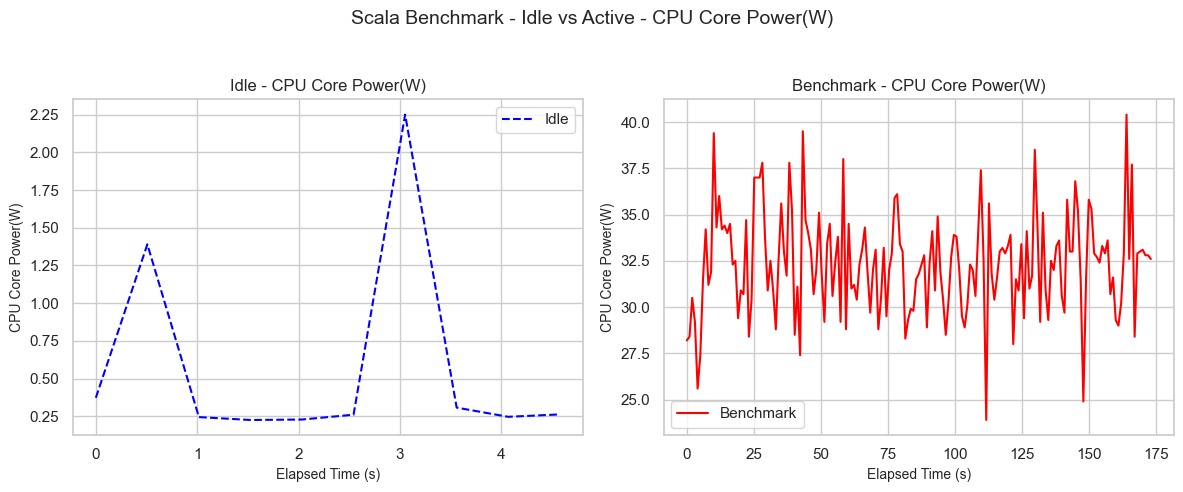

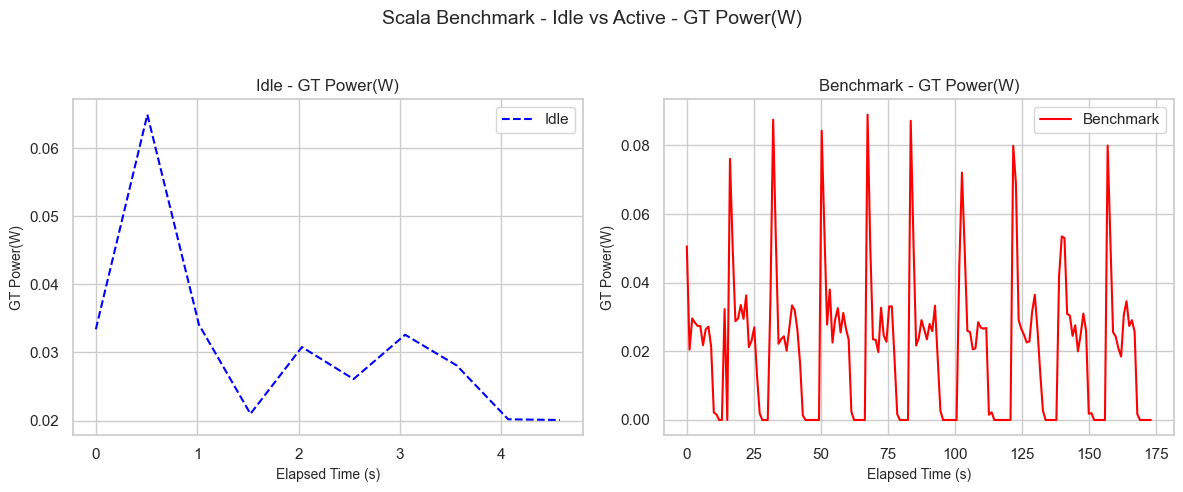

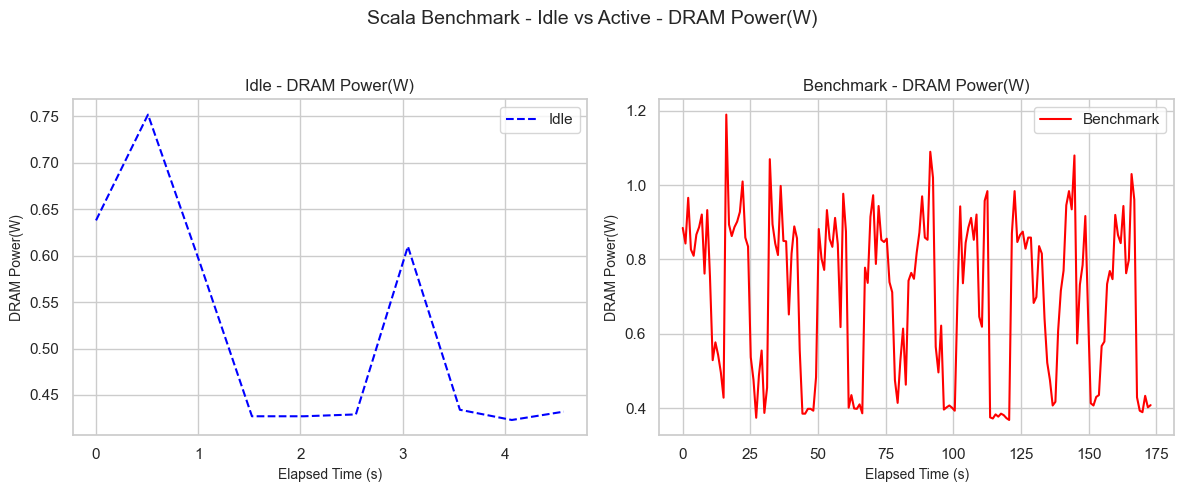

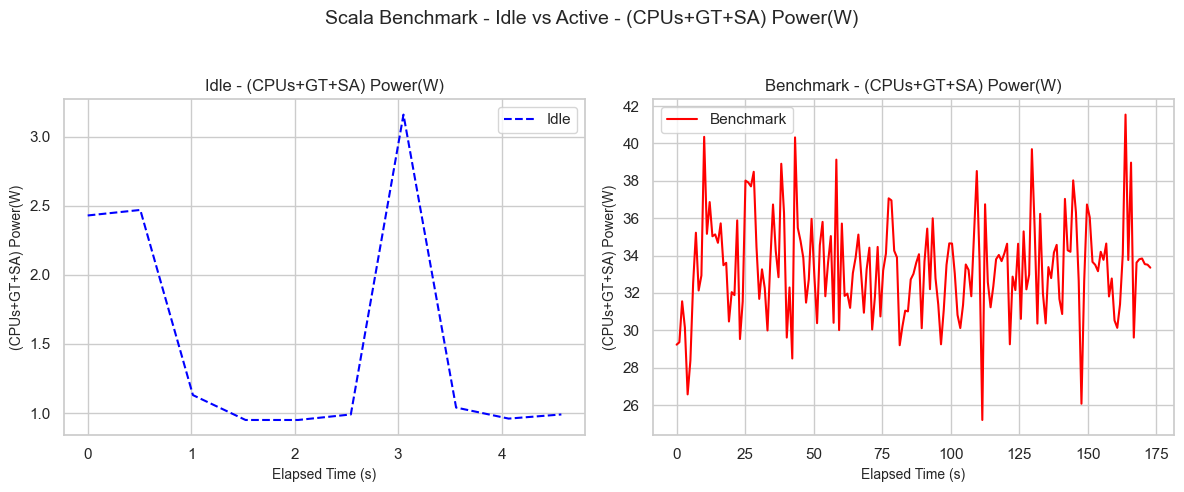

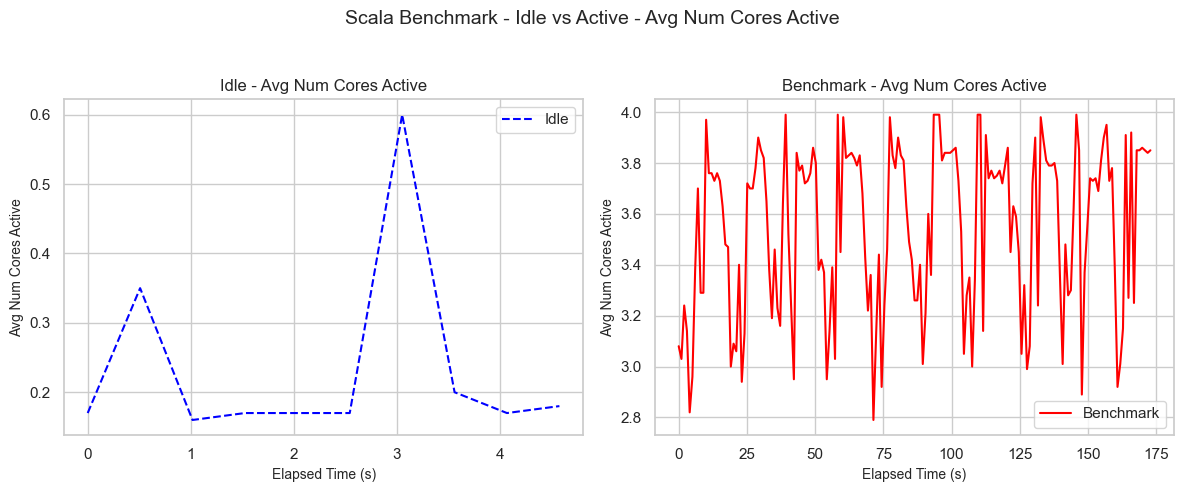

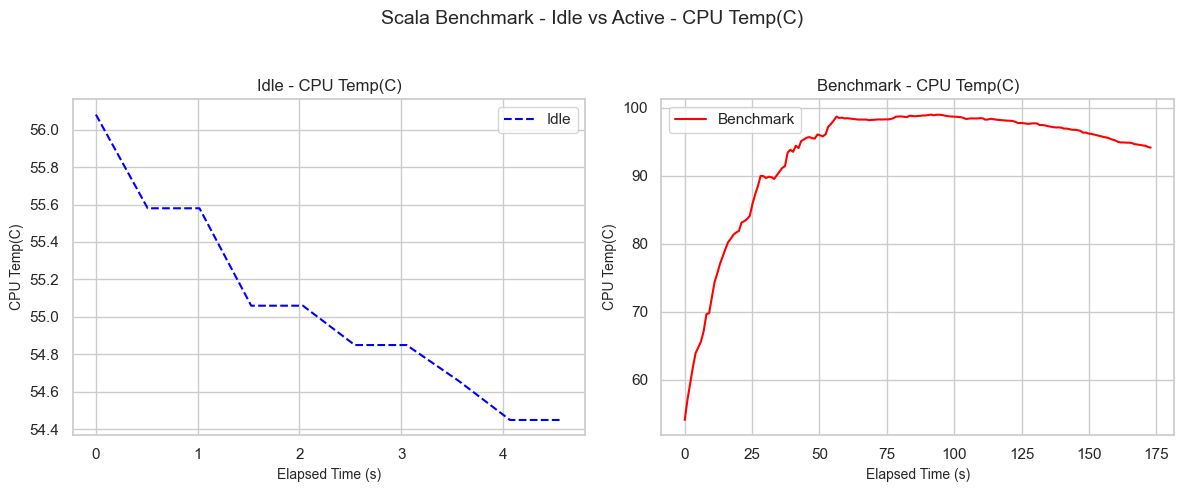

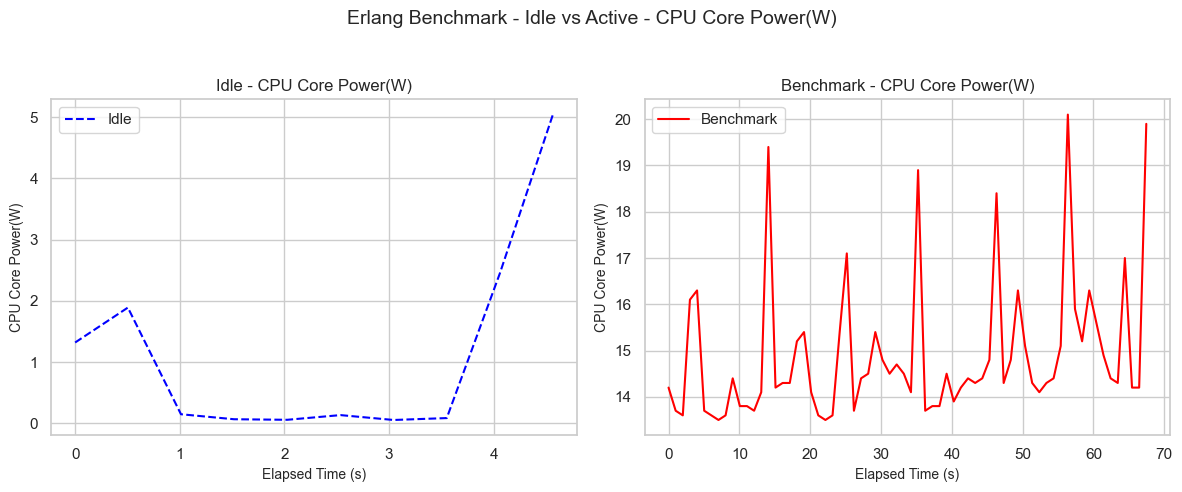

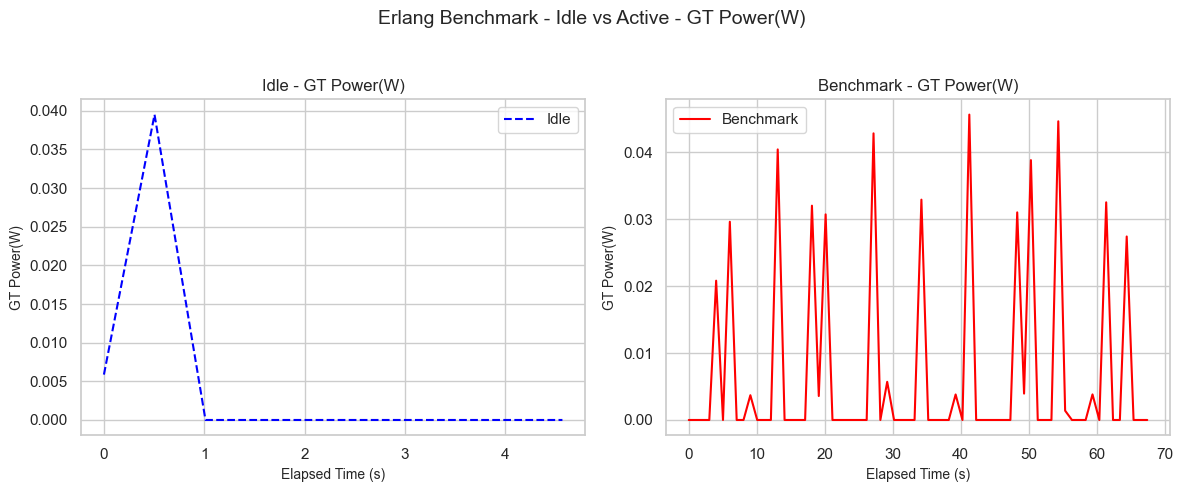

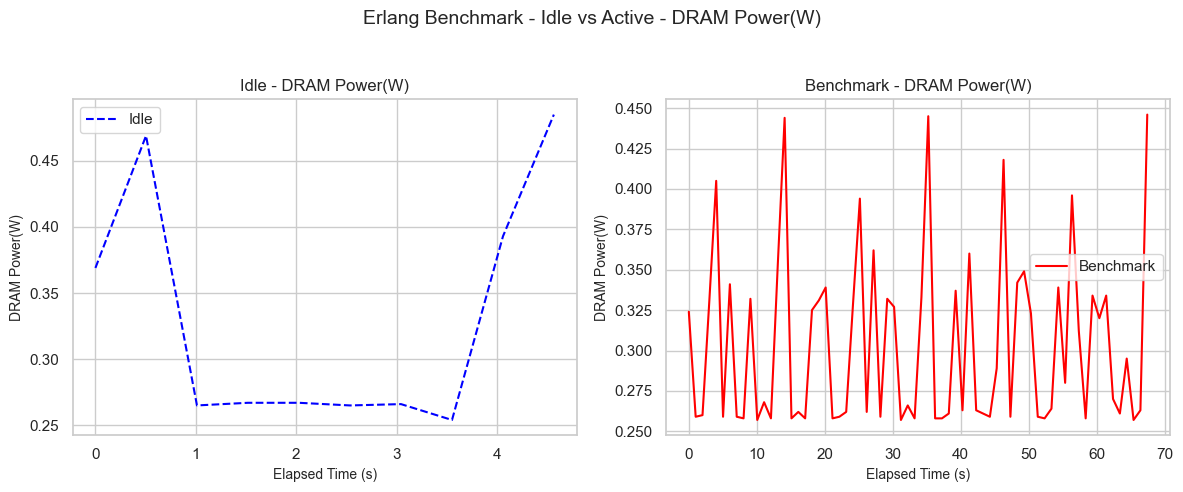

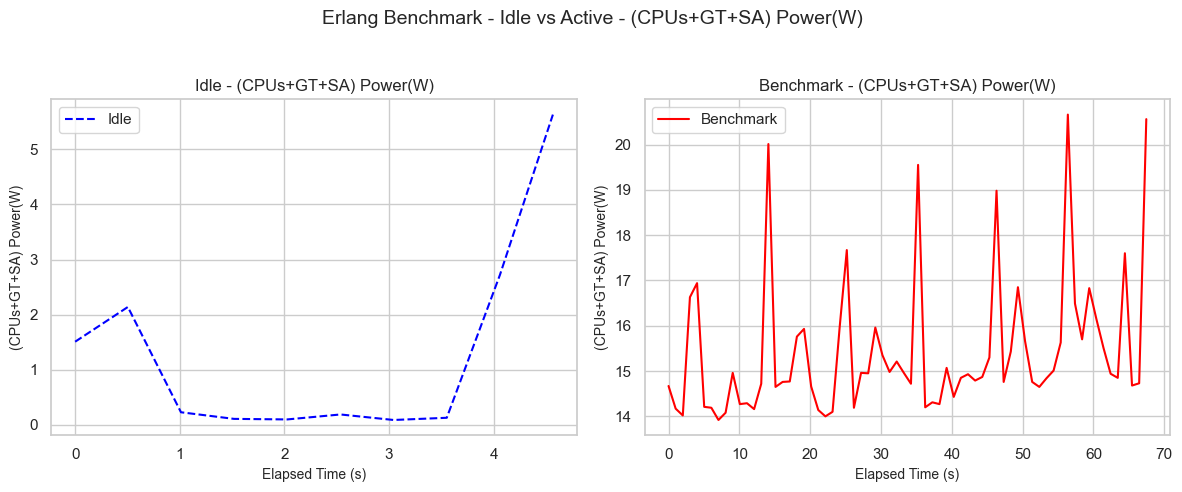

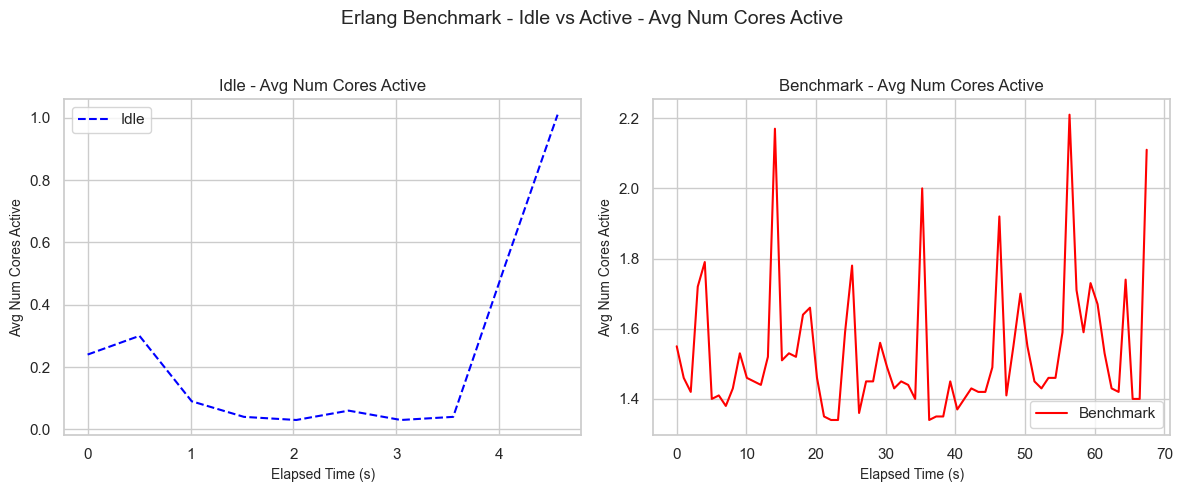

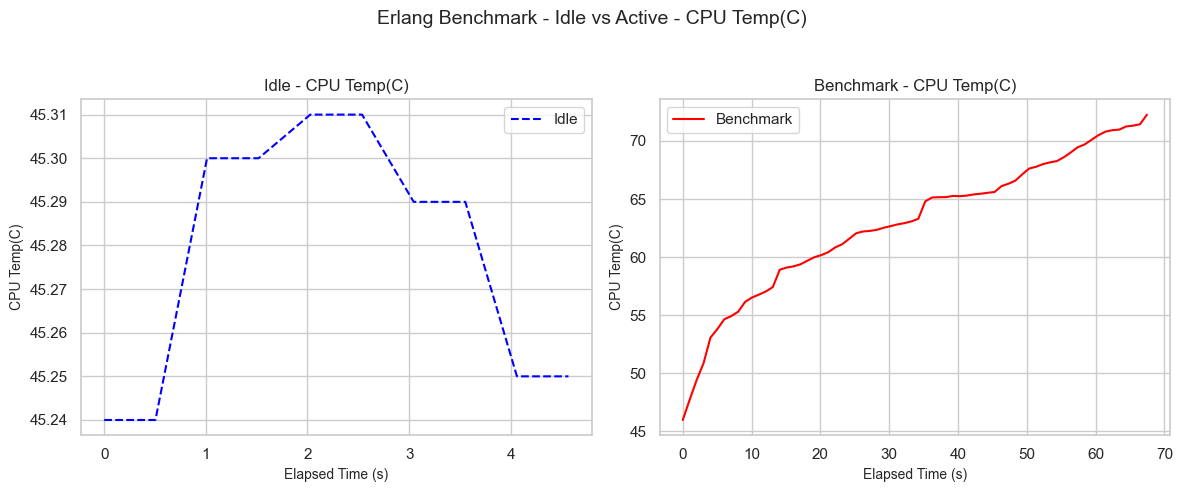

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
title_config_prefix = f"({n} Messages, {ITERATIONS} Iterations)"

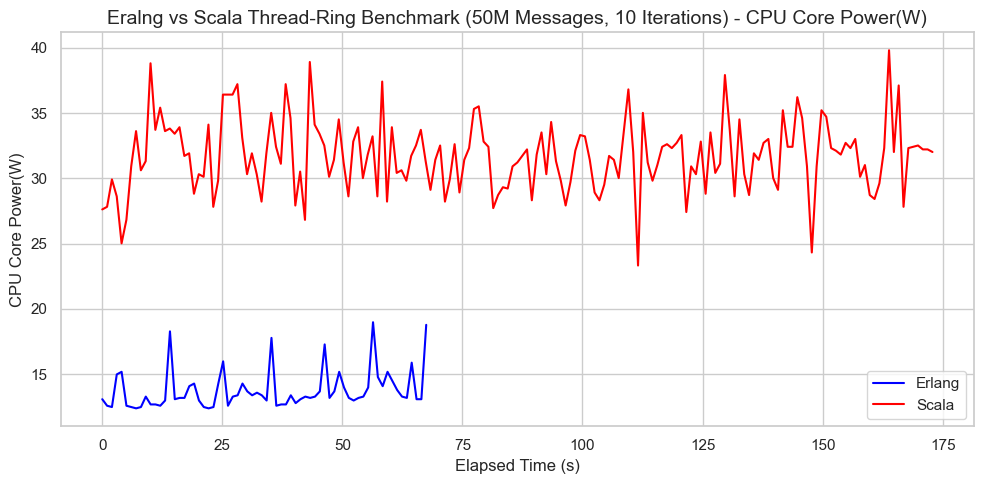

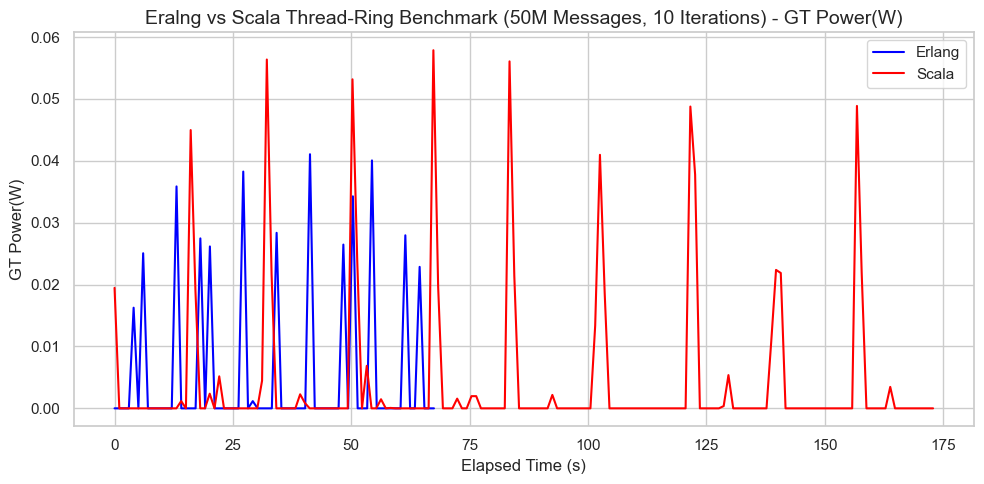

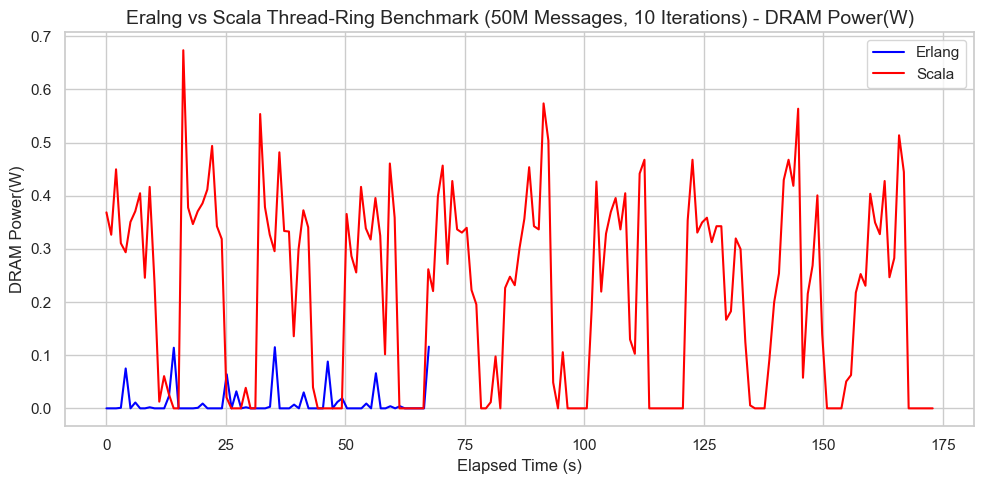

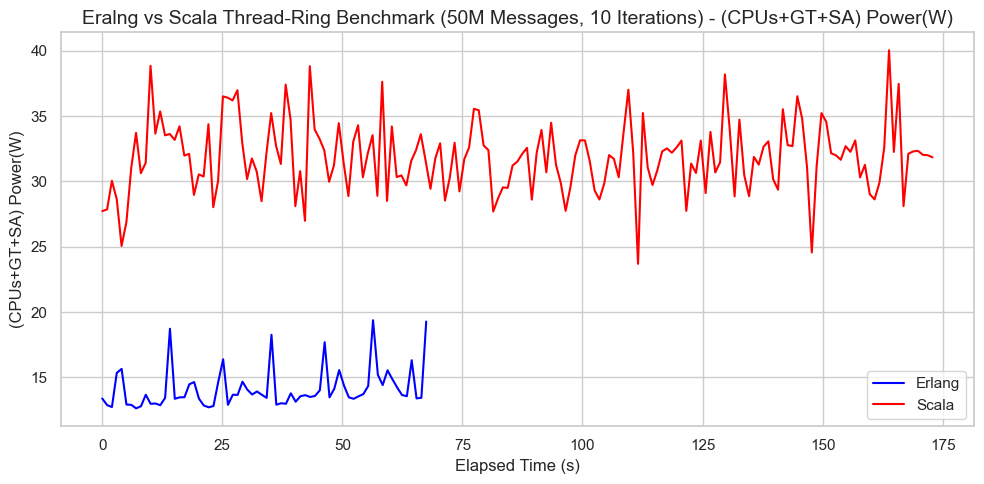

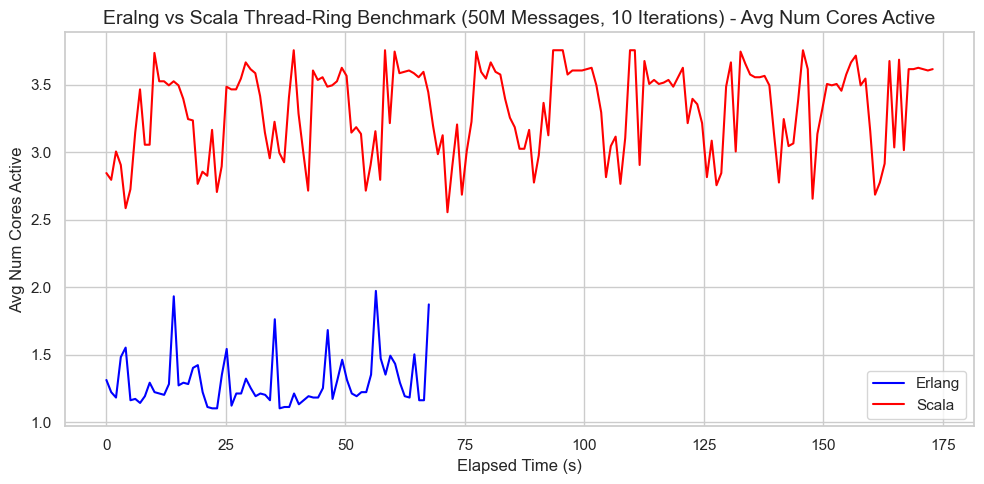

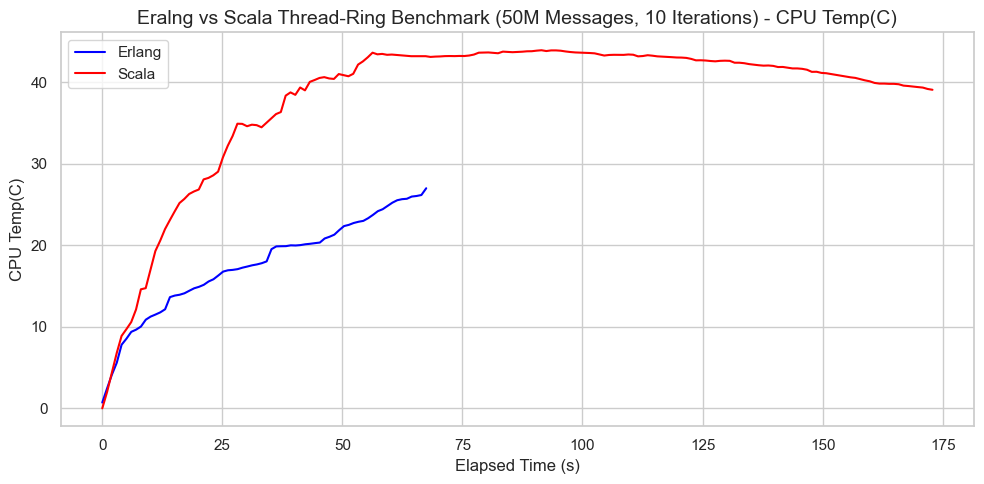

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        31.728314
GT Power(W)              -0.009572
DRAM Power(W)             0.187947
(CPUs+GT+SA) Power(W)    31.842364
CPU Temp(C)              38.121237
Avg Num Cores Active      3.314035
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        13.765976
GT Power(W)               0.002449
DRAM Power(W)            -0.026618
(CPUs+GT+SA) Power(W)    14.138088
CPU Temp(C)              17.617000
Avg Num Cores Active      1.297706
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/count/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 5537.0782568132945 Joules
Erlang Benchmark: 968.0518671764706 Joules
